In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [2]:
data=[]
with open('DeltaDump2016TillApril.txt') as f:
    for line in f:
        data.append(json.loads(line))
count=dict()
for i in range(len(data)):
    if data[i]['eid']=="OE_INTERACT":
        if data[i]['edata']['eks']['id']=="mainMenu.quit.confirm":
            d=datetime.datetime.strptime(data[i]['ts'][:18], "%Y-%m-%dT%H:%M:%S")
            for k in range(i-10, i):
                if data[k]['eid']=="OE_INTERACT":
                    if (d-datetime.datetime.strptime(data[k]['ts'][:18], "%Y-%m-%dT%H:%M:%S")).seconds<60:
                        count[data[k]['edata']['eks']['id']]=count.get(data[k]['edata']['eks']['id'], 0)+1 

In [3]:
new_count=pd.DataFrame({"count":count})

In [6]:
new_count.sort_values(["count"],ascending=False)

,count
mainMenu.quit,213
hud.pause,154
levelComplete,80
suitcase.stamp,58
levelComplete.continue,56
suitcase.close,49
hint.handHold,32
hud.submit,25
level.feedback.correct,23
gameplay.onesColumn,22


In [58]:
temp=new_count[new_count["count"]>20] 
temp=temp[temp["count"]<200]
temp

,count
hint.handHold,23
hud.pause,120
levelComplete,51
levelComplete.continue,36
suitcase.close,34
suitcase.stamp,32


In [4]:
temp=new_count[new_count["count"]>20] 
temp=temp[temp["count"]<200]
temp

,count
gameplay.onesColumn,22
gameplay.onesQueue,21
hint.handHold,32
hud.pause,154
hud.submit,25
level.feedback.correct,23
levelComplete,80
levelComplete.continue,56
suitcase.close,49
suitcase.stamp,58


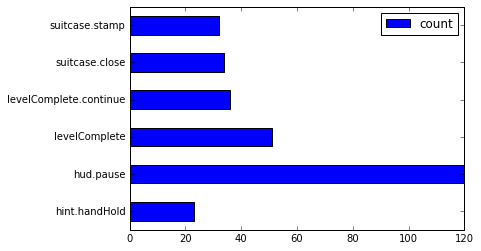

In [53]:
%matplotlib inline
temp.plot(temp.index,["count"],kind="barh")

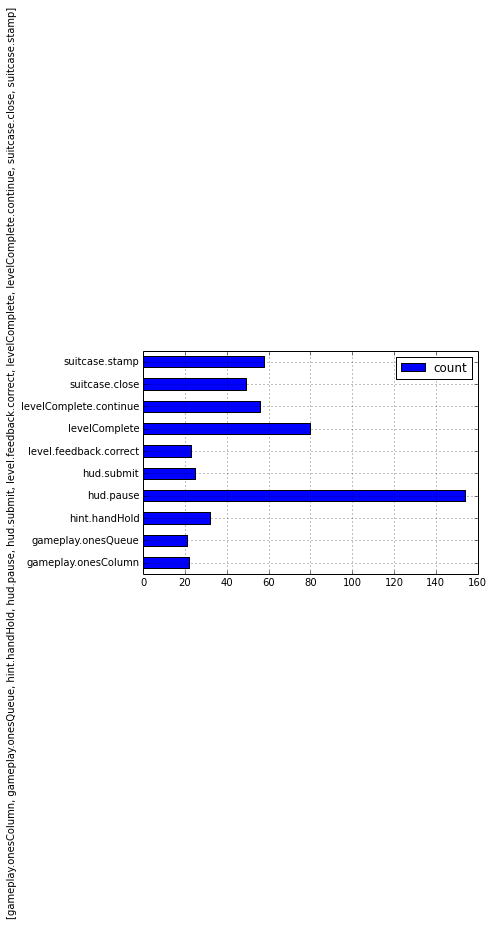

In [5]:
%matplotlib inline
temp.plot(temp.index,["count"],kind="barh")